In [51]:
# b) Which variant will earn the most money by Day 15 ?

# First of all, the necessary libraries imported to the notebook.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def retention_curve(d1, d3, d7, d14, maximum=30):
    # Calculating retention points with log-linear interpolation for not known days (From D0 to D14) 
    known_days = np.array([0,1,3,7,14])
    reten_rates = ([1.0, d1, d3, d7, d14])
    reten_days = np.arange(0, maximum + 1)
    log_reten_known = np.log(reten_rates)
    log_reten_days = np.interp(reten_days, known_days, log_reten_known)
    reten_back  = np.exp(log_reten_days)
    
    # After D14 
    slope = (np.log(d14) - np.log(d7)) / 7
    for day in range(15, maximum + 1):
        reten_back[day] = np.exp(np.log(d14) + slope * (day - 14))
    
    return pd.Series(reten_back, index=reten_days, name="retention")


# The question asks for total money by DAY 15, so we use same logic at the below piece of code that is programmed in the "retention_curve.ipynb".
A = retention_curve(0.53, 0.27, 0.17, 0.06, maximum=30)
B = retention_curve(0.48, 0.25, 0.19, 0.09, maximum=30)
installs = 20000

A_dau = installs * A.cumsum().loc[0:15]
B_dau = installs * B.cumsum().loc[0:15]

For this question, there will be an assumption for calculating the daily purchasing revenue. For calculating purchasing revenue, the model is :
Purchasing Revenue (t): Daily Purchase Ratio x DAU(t) x $1 ,  (t = 0, 1, 2, 3, ... 30)

Daily Purchase Ratio: It is a daily purchasing ratio which is given table from instructions.
DAU(t): This means Daily Active Users on the time of "t". The detailed explaination for this metric is in the "retention_curve.ipynb".
$1: Since there is no available given fact about average purchasing cost or any given fact about how much cost for one purchasing, I assumed that every purchasing item is 1 dollar. 


In [52]:
A_purch_ratio = 0.0305
B_purch_ratio = 0.0315

# Calculating Daily Purchase Revenue: DPR = A(DAU(t)) * daily purchase ratio * $1 for by Day 15 
A_DPR = A_dau * A_purch_ratio * 1
B_DPR = B_dau * B_purch_ratio * 1

print("After 15 Days' Purchase Revenue for Variant A is: ", sum((A_DPR)))
print("After 15 Days' Purchase Revenue for Variant B is: ", sum((B_DPR)))

After 15 Days' Purchase Revenue for Variant A is:  27644.13726511387
After 15 Days' Purchase Revenue for Variant B is:  28436.953961068084


The below code includes these parameters:
Ad Impression / DAU: Daily Ad views per user which is given data from the instructions
eCPM: Ad revenue per 1000 user views. This is also given.
DAU(t): This means Daily Active Users on the time of "t". The detailed explaination for this metric is in the "retention_curve.ipynb".

In [53]:
# Calculating Ad Revenue = (AD Impresssion/DAU) * eCPM * DAU(t) by Day 15
A_eCPM = 9.80
B_eCPM = 10.80

A_Ad_DAU = 2.3
B_Ad_DAU = 1.6

A_Ad_Revenue = A_Ad_DAU * (A_eCPM / 1000) * A_dau
B_Ad_Revenue = B_Ad_DAU * (B_eCPM / 1000) * B_dau

print("After 15 Days' Ad Revenue for Variant A is: ", sum((A_Ad_Revenue)))
print("After 15 Days' Ad Revenue for Variant B is: ", sum((B_Ad_Revenue)))

After 15 Days' Ad Revenue for Variant A is:  20429.47062149726
After 15 Days' Ad Revenue for Variant B is:  15599.700458643063


In [56]:
# Calculating the total money by Day 15 : IAP(t) + Ad(t)

A_total = sum((A_DPR)) + sum((A_Ad_Revenue))
B_total = sum((B_DPR)) + sum((B_Ad_Revenue))

print("Variant A will earn by Day 15: ", A_total)
print("Variant B will earn by Day 15: ", B_total,"\n")

if A_total > B_total:
    print("Variant A will earn the most total money by Day 15: ", A_total)
else:
    print("Variant B will earn the most total money by Day 15: ", B_total)

Variant A will earn by Day 15:  48073.607886611135
Variant B will earn by Day 15:  44036.65441971115 

Variant A will earn the most total money by Day 15:  48073.607886611135


Interestingly, Variant B has the most purchasing money than Variant A. However, Variant A will earn much more money for Ad Revenue from Variant B and by Day 15 Variant A will earn the most total money.    

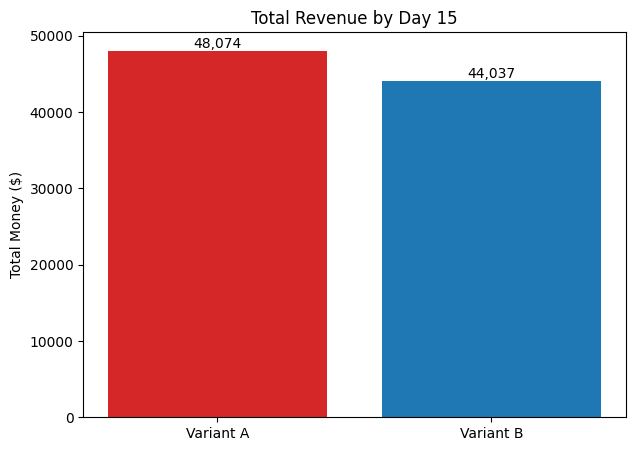

In [57]:
plt.figure(figsize=(7,5))
bar_colors = ['tab:red', 'tab:blue']
plt.bar(["Variant A", "Variant B"], [A_total, B_total], color=bar_colors)

plt.ylabel("Total Money ($)")
plt.title("Total Revenue by Day 15")
plt.text(0, A_total, f"{A_total:,.0f}", ha="center", va="bottom")
plt.text(1, B_total, f"{B_total:,.0f}", ha="center", va="bottom")
plt.show()